Input initial guess:1
[[1, 1], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [-0.14256492718762875, 0.7855466747113461], [

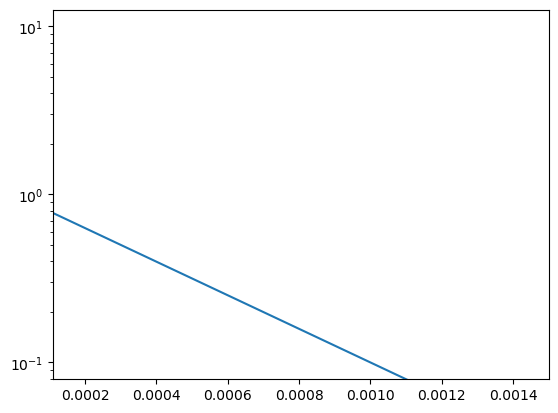

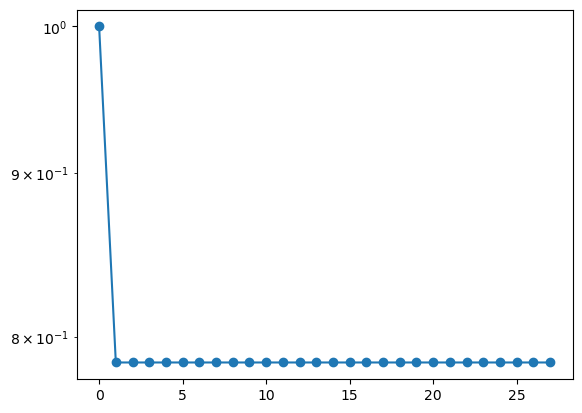

In [1]:
#Submission by: Daniel Rivera | MAE 598: Design Optimization | Prof. Max Yi Ren
#Problem 2 Answer using gradient and Newton's Method
import numpy as np
import matplotlib.pyplot as plt
#Original Function
obj = lambda x: 5 * x[0] ** 2 + 12 * x[0] * x[1] - 8 * x[0] + 10 * x[1] ** 2 - 14 * x[1] + 5


def grad(x):  # gradient found for 2 dimensional function
    return [10 * x[0] + 12 * x[1] - 8, 12 * x[0] + 20 * x[1] - 14]

#Eps is used to minimize error
eps = 1e-3
#Specify Input
xin = int(input('Input initial guess:'))  # different guesses were tested with low numbers displaying
#Let n be your counter
n = 0
#Create a solution that initializes with your input
soln = [[xin, xin]]

x = [xin, xin]

error = np.linalg.norm(grad(x))

#start Newton's method that uses lambda and phi
def line_search(x):
    a = 1.
    phi = lambda a, x: [obj(x) - a * .8 * grad(x)[0] ** 2, obj(x) - a * .8 * grad(x)[1] ** 2]

    while phi(a, x)[0] < obj([x[0] - a * grad(x)[0], x[1] - a * grad(x)[1]]) and phi(a, x)[1] < obj(
            [x[0] - a * grad(x)[0], x[1] - a * grad(x)[1]]):
        # outputted value only returning one unchanged number error in this while loop
        a = .5 * a

    return a

#use a while loop to minimize error
while error >= eps:
    a = line_search(x)
    x[0] = x[0] - a * grad(x)[0]
    x[1] = x[1] - a * grad(x)[1]
    soln.append(x)
    error = np.linalg.norm(grad(x))

print(soln)
#zip your solution to convert your tupled solution into a plottable list
y1, y2= zip(*soln)
print(y1)
print(y2)
#plot x2 and x3 and call them y1 and y2 respectively (x1 can be solved mathematically from given contraint
plt.yscale("log")
plt.xlim(0.00011,0.0015)
plt.scatter(range(len(y1)),y1)
plt.plot(range(len(y1)),y1)
plt.show()

plt.yscale("log")
plt.scatter(range(len(y2)),y2)
plt.plot(range(len(y2)),y2)
plt.show()